In [1]:
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import seaborn as sns

In [22]:
import pandas as pd

# train 데이터 셋을 가지고 전처리를 진행
train_df = pd.read_csv('train.csv')
#test_df = pd.read_csv('test.csv')

In [3]:
train_df.isnull().sum() ## 결측치 확인

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [4]:
train_df.describe().T ## outlier detection

,count,mean,std,min,25%,50%,75%,max
base_date,4701217.0,2.021672e+07,4555.708569,2.021090e+07,2.021110e+07,2.022013e+07,2.022050e+07,2.022073e+07
base_hour,4701217.0,1.192820e+01,6.722092,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
lane_count,4701217.0,1.836651e+00,0.687751,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
road_rating,4701217.0,1.049585e+02,1.840107,1.030000e+02,1.030000e+02,1.060000e+02,1.070000e+02,1.070000e+02
multi_linked,4701217.0,4.762597e-04,0.021818,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
connect_code,4701217.0,2.660218e-01,5.227760,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.030000e+02
maximum_speed_limit,4701217.0,6.125329e+01,12.133539,3.000000e+01,5.000000e+01,6.000000e+01,7.000000e+01,8.000000e+01
vehicle_restricted,4701217.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
weight_restricted,4701217.0,5.618742e+03,13953.433235,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+04
height_restricted,4701217.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### 데이터 시각화

In [23]:
day_avg = train_df.groupby(['day_of_week'])['target'].mean().sort_values(ascending=False).reset_index()
max_avg = train_df.groupby(['maximum_speed_limit'])['target'].mean().sort_values(ascending=False).reset_index()
hour_avg = train_df.groupby(['base_hour'])['target'].mean().sort_values(ascending=False).reset_index()
lane_avg = train_df.groupby(['lane_count'])['target'].mean().sort_values(ascending=False).reset_index()
month = train_df['base_date']//100
temp_train_df = train_df
temp_train_df['month']= month
month_avg = temp_train_df.groupby(['month'])['target'].mean().sort_values(ascending=False).reset_index()

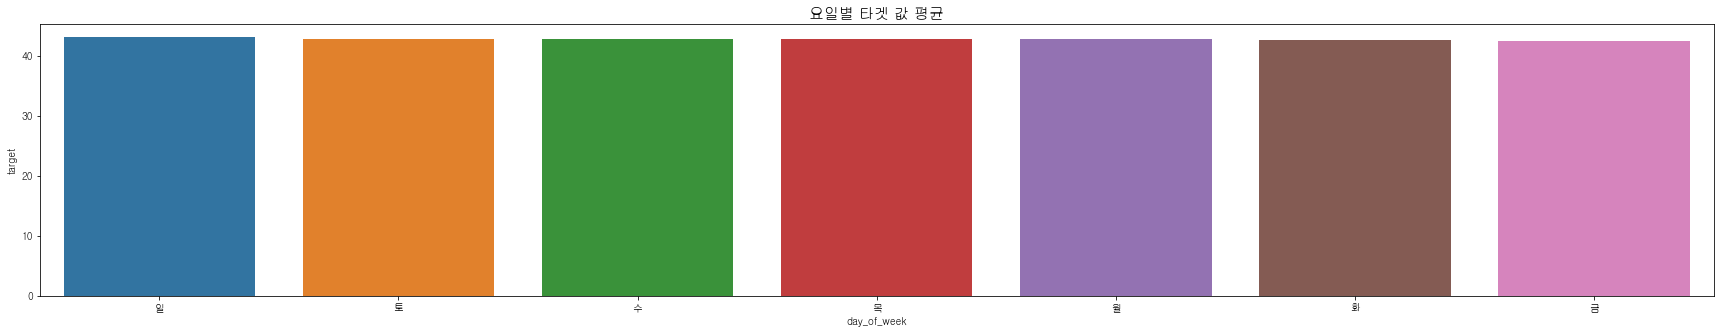

In [6]:
plt.figure(figsize = (30, 5))
sns.barplot(x = 'day_of_week', y = 'target', data = day_avg)
plt.title('요일별 타겟 값 평균', fontsize = 15)
plt.show()

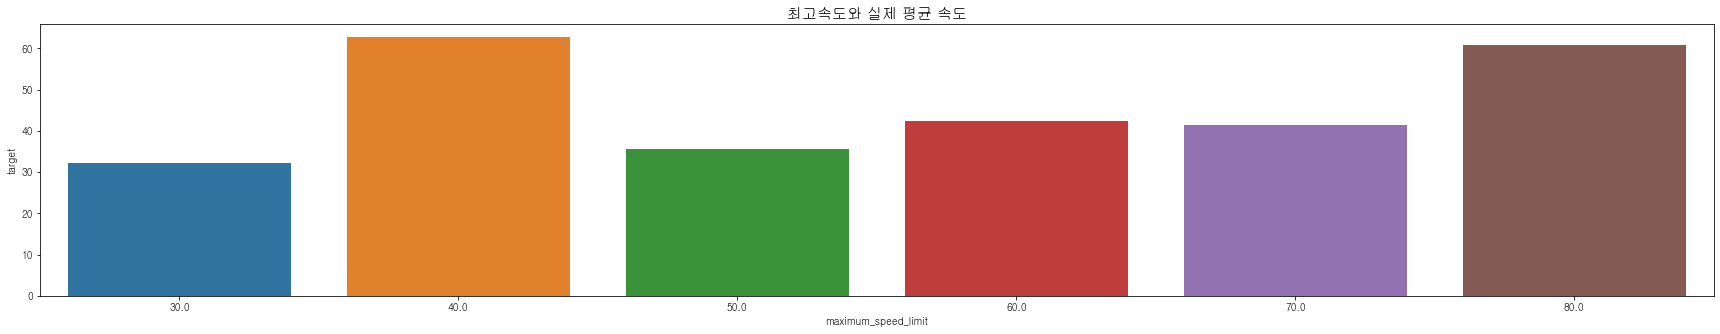

In [7]:
plt.figure(figsize = (30, 5))
sns.barplot(x = 'maximum_speed_limit', y = 'target', data = max_avg)
plt.title('최고속도와 실제 평균 속도', fontsize = 15)
plt.show()

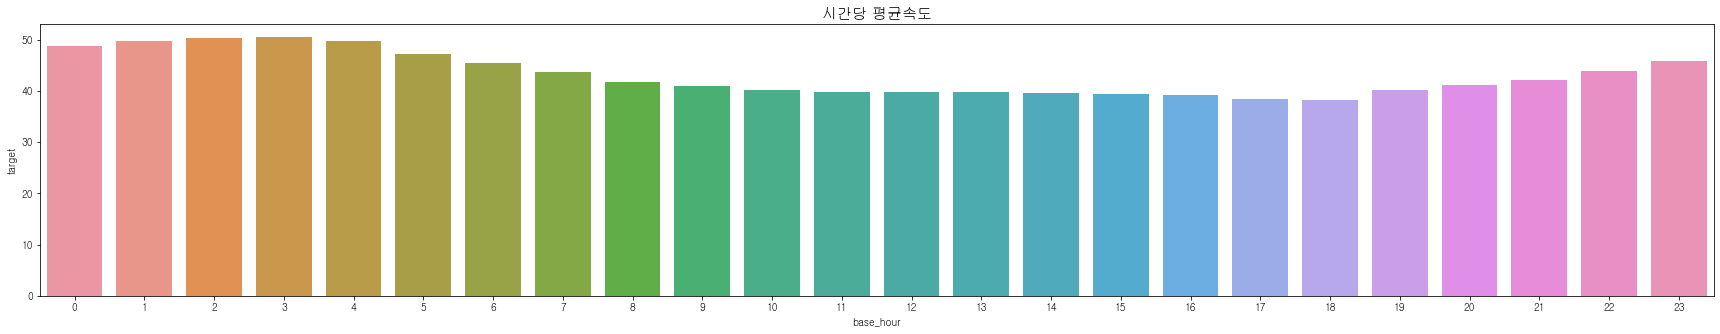

In [8]:
plt.figure(figsize = (30, 5))
sns.barplot(x = 'base_hour', y = 'target', data = hour_avg)
plt.title('시간당 평균속도', fontsize = 15)
plt.show()

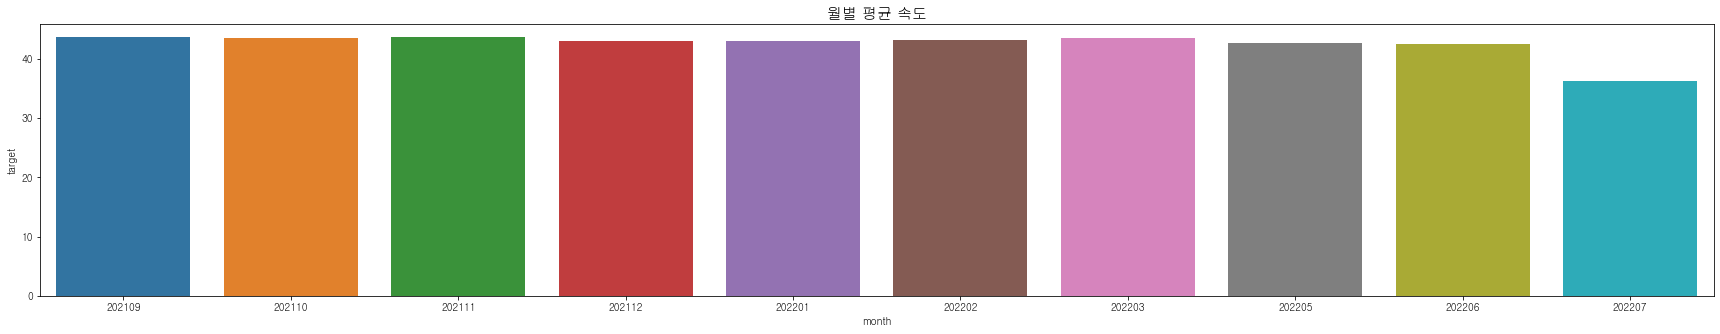

In [9]:
plt.figure(figsize = (30, 5))
sns.barplot(x = 'month', y = 'target', data = month_avg)
plt.title('월별 평균 속도', fontsize = 15)
plt.show()

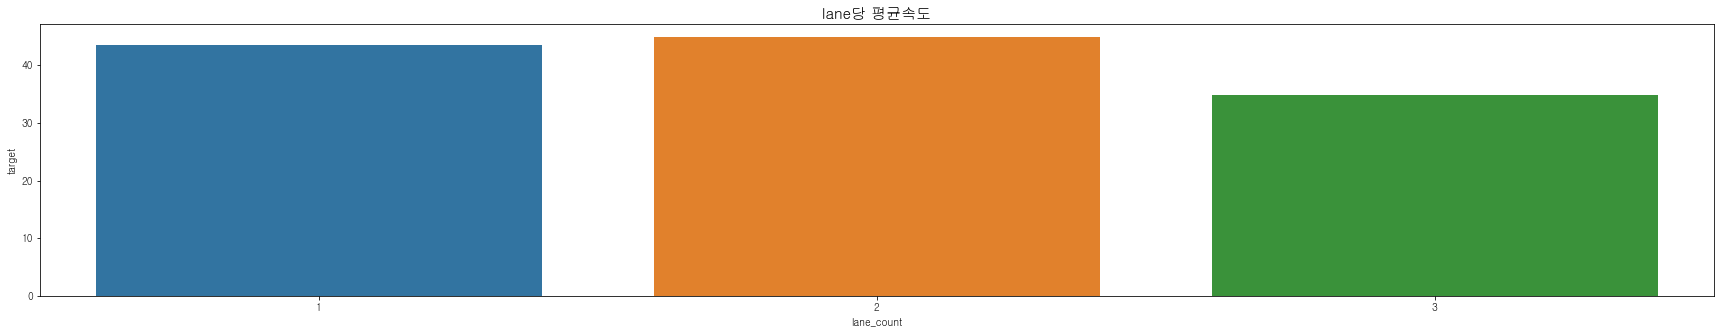

In [10]:
plt.figure(figsize = (30, 5))
sns.barplot(x = 'lane_count', y = 'target', data = lane_avg)
plt.title('lane당 평균속도', fontsize = 15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='end_latitude', ylabel='Density'>

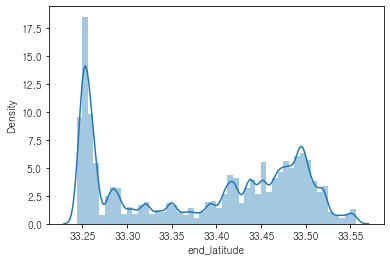

In [11]:
sns.distplot(train_df['end_latitude'])

### 데이터 전처리

In [24]:
# start_turn_restricted, end_turn_restricted
# 둘 다 없음, 있음의 답변을 가지므로 0,1로 바꾸어줌
train_df['start_turn_restricted'] = train_df['start_turn_restricted'].apply(lambda x: 0 if x=='없음' else 1)
train_df['start_turn_restricted']

0          0
1          1
2          0
3          0
4          0
          ..
4701212    0
4701213    0
4701214    0
4701215    0
4701216    0
Name: start_turn_restricted, Length: 4701217, dtype: int64

In [25]:
train_df['end_turn_restricted'] = train_df['end_turn_restricted'].apply(lambda x: 0 if x=='없음' else 1)
train_df['end_turn_restricted']

0          0
1          0
2          0
3          0
4          0
          ..
4701212    0
4701213    0
4701214    0
4701215    0
4701216    0
Name: end_turn_restricted, Length: 4701217, dtype: int64

In [26]:
# 'id','vehicle_restricted','height_restricted','start_node_name','end_node_name','road_name'
# id의 경우 의미가 없어서 지움
# 'vehicle_restricted','height_restricted': 모든 값이 0이라서 의미가 없음
# 'start_node_name','end_node_name': 각각 start_latitude, start_longitude / end_latitude, end_longitude로 표현가능하므로 지움.
# 'road_name': 결과값의 종류가 너무 많아서 지움
train_df.drop(['id','vehicle_restricted','height_restricted','start_node_name','end_node_name','road_name'],axis=1,inplace=True)

In [27]:
# 날짜 데이터를 분기별로 나누어서 전처리 진행
train_df["base_date"] = pd.to_datetime(train_df["base_date"], format="%Y%m%d")

In [28]:
train_df['base_quarter'] = train_df['base_date'].dt.quarter

In [29]:
# day_of_week, connect_code, weight_restricted, road_type, base_hour, base_quarter, road_rating
# 전부 원 핫 인코딩 처리
week_day = pd.get_dummies(train_df['day_of_week'])
train_df = pd.concat([train_df,week_day],axis=1)

In [30]:
connect = pd.get_dummies(train_df['connect_code'])
train_df = pd.concat([train_df,connect],axis=1)

In [31]:
weight = pd.get_dummies(train_df['weight_restricted'])
train_df = pd.concat([train_df,weight],axis=1)

In [32]:
road_type = pd.get_dummies(train_df['road_type'])
train_df = pd.concat([train_df, road_type],axis=1)

In [33]:
hour = pd.get_dummies(train_df['base_hour'])
train_df = pd.concat([train_df,hour],axis=1)

In [34]:
quarter = pd.get_dummies(train_df['base_quarter'])
train_df = pd.concat([train_df,quarter],axis=1)

In [35]:
rate = pd.get_dummies(train_df['road_rating'])
train_df = pd.concat([train_df,rate],axis=1)
train_df

,base_date,day_of_week,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,...,21,22,23,1,2,3,4,103,106,107
0,2022-06-23,목,17,1,106,0,0,60.0,32400.0,3,...,0,0,0,0,1,0,0,0,1,0
1,2022-07-28,목,21,2,103,0,0,60.0,0.0,0,...,1,0,0,0,0,1,0,1,0,0
2,2021-10-10,일,7,2,103,0,0,80.0,0.0,0,...,0,0,0,0,0,0,1,1,0,0
3,2022-03-11,금,13,2,107,0,0,50.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1
4,2021-10-05,화,8,2,103,0,0,80.0,0.0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,2021-11-04,목,16,1,107,0,0,50.0,0.0,0,...,0,0,0,0,0,0,1,0,0,1
4701213,2022-03-31,목,2,2,107,0,0,80.0,43200.0,3,...,0,0,0,1,0,0,0,0,0,1
4701214,2022-06-13,월,22,2,103,0,0,60.0,0.0,0,...,0,1,0,0,1,0,0,1,0,0
4701215,2021-10-20,수,2,2,103,0,0,80.0,0.0,0,...,0,0,0,0,0,0,1,1,0,0


In [36]:
train_df.columns

Index([            'base_date',           'day_of_week',
                   'base_hour',            'lane_count',
                 'road_rating',          'multi_linked',
                'connect_code',   'maximum_speed_limit',
           'weight_restricted',             'road_type',
              'start_latitude',       'start_longitude',
       'start_turn_restricted',          'end_latitude',
               'end_longitude',   'end_turn_restricted',
                      'target',                 'month',
                'base_quarter',                     '금',
                           '목',                     '수',
                           '월',                     '일',
                           '토',                     '화',
                             0,                     103,
                           0.0,                 32400.0,
                       43200.0,                 50000.0,
                             0,                       3,
                             0,

In [37]:
train_df.drop(['base_date','day_of_week','connect_code','weight_restricted','road_type','base_hour','base_quarter','month','road_rating'], axis=1,inplace=True)

In [38]:
train_df.columns

Index([           'lane_count',          'multi_linked',
         'maximum_speed_limit',        'start_latitude',
             'start_longitude', 'start_turn_restricted',
                'end_latitude',         'end_longitude',
         'end_turn_restricted',                'target',
                           '금',                     '목',
                           '수',                     '월',
                           '일',                     '토',
                           '화',                       0,
                           103,                     0.0,
                       32400.0,                 43200.0,
                       50000.0,                       0,
                             3,                       0,
                             1,                       2,
                             3,                       4,
                             5,                       6,
                             7,                       8,
                             9,

In [39]:
train_df.columns=[           'lane_count',          'multi_linked',
         'maximum_speed_limit',        'start_latitude',
             'start_longitude', 'start_turn_restricted',
                'end_latitude',         'end_longitude',
         'end_turn_restricted',                'target',
                           '금',                     '목',
                           '수',                     '월',
                           '일',                     '토',
                           '화',                       'code_0',
                           'code_103',                     'weight_0',
                       'weight_32400',                 'weight_43200',
                       'weight_50000',                       'road_0',
                             'road_3',                       'hour_0',
                             'hour_1',                       'hour_2',
                             'hour_3',                       'hour_4',
                             'hour_5',                       'hour_6',
                             'hour_7',                       'hour_8',
                             'hour_9',                      'hour_10',
                            'hour_11',                      'hour_12',
                            'hour_13',                      'hour_14',
                            'hour_15',                      'hour_16',
                            'hour_17',                      'hour_18',
                            'hour_19',                      'hour_20',
                            'hour_21',                      'hour_22',
                            'hour_23',                       'quarter_1',
                             'quarter_2',                       'quarter_3',
                             'quarter_4',                     'rating_103',
                           'rating_106',                     'rating_107']

In [41]:
# 시작/도착 지점의 위도와 경도의 정규화 진행 (Min-Max scaling)
train_df[['norm_start_latitude', 'norm_start_longitude', 'norm_end_latitude', 'norm_end_longitude']] = (train_df[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']]-train_df[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']].min())/(train_df[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']].max()-train_df[['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude']].min())
train_df = train_df.drop(['start_latitude', 'start_longitude', 'end_latitude', 'end_longitude'], axis = 1)

In [43]:
train_df.to_csv("10조_분석쉽조.csv")

In [32]:
temp = pd.read_csv("10조_분석쉽조.csv")

In [33]:
temp

,Unnamed: 0,lane_count,multi_linked,maximum_speed_limit,start_turn_restricted,end_turn_restricted,target,금,목,수,...,quarter_2,quarter_3,quarter_4,rating_103,rating_106,rating_107,norm_start_latitude,norm_start_longitude,norm_end_latitude,norm_end_longitude
0,0,1,0,60.0,0,0,52.0,0,1,0,...,1,0,0,0,1,0,0.589530,0.641427,0.589534,0.641057
1,1,2,0,60.0,1,0,30.0,0,1,0,...,0,1,0,1,0,0,0.822965,0.463021,0.836017,0.459191
2,2,2,0,80.0,0,0,61.0,0,0,0,...,0,0,1,1,0,0,0.114228,0.248530,0.117193,0.239911
3,3,2,0,50.0,0,0,20.0,1,0,0,...,0,0,0,0,0,1,0.008473,0.513932,0.006824,0.512628
4,4,2,0,80.0,0,0,38.0,0,0,0,...,0,0,1,1,0,0,0.699772,0.192342,0.701251,0.197154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,4701212,1,0,50.0,0,0,20.0,0,1,0,...,0,0,1,0,0,1,0.571610,0.127629,0.567803,0.121783
4701213,4701213,2,0,80.0,0,0,65.0,0,1,0,...,0,0,0,0,0,1,0.732686,0.323057,0.732751,0.323755
4701214,4701214,2,0,60.0,0,0,30.0,0,0,0,...,1,0,0,1,0,0,0.651694,0.975462,0.641900,0.975955
4701215,4701215,2,0,80.0,0,0,73.0,0,0,1,...,0,0,1,1,0,0,0.640222,0.333011,0.644699,0.335035
